In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.express as px

plt.rcParams['figure.figsize'] = [20, 16]
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('/kaggle/input/krvskpdataset/kr-vs-kp.csv')
display(dataset)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


In [3]:
dataset.head(5)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [4]:
for col in dataset.columns:
    encoder = LabelEncoder()
    dataset[col] = encoder.fit_transform(dataset[col])

# Remove the id column as it's neither a dependent nor independent variable
# Display top 5 rows of Iris Dataset
# dataset.info()
display(dataset.head(5))
print(dataset.shape)
# Obtain the columns corresponding to independent features
Y = dataset[['class']]
X = dataset.drop(columns=['class'])

# Generate profile report
"""
profile = ProfileReport(dataset)
profile.to_file(output_file='report.html')
"""

FEATURES_LIST = X.columns.values.tolist()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1


(3196, 37)


In [5]:
display(X)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3192,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3193,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3194,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
bkblk,3196.0,0.111702,0.315049,0.0,0.0,0.0,0.0,1.0
bknwy,3196.0,0.070401,0.255861,0.0,0.0,0.0,0.0,1.0
bkon8,3196.0,0.037547,0.190128,0.0,0.0,0.0,0.0,1.0
bkona,3196.0,0.100751,0.301046,0.0,0.0,0.0,0.0,1.0
bkspr,3196.0,0.333855,0.471662,0.0,0.0,0.0,1.0,1.0
bkxbq,3196.0,0.461202,0.498570,0.0,0.0,0.0,1.0,1.0
bkxcr,3196.0,0.366083,0.481808,0.0,0.0,0.0,1.0,1.0
bkxwp,3196.0,0.217772,0.412796,0.0,0.0,0.0,0.0,1.0
blxwp,3196.0,0.380476,0.485580,0.0,0.0,0.0,1.0,1.0
bxqsq,3196.0,0.303817,0.459977,0.0,0.0,0.0,1.0,1.0


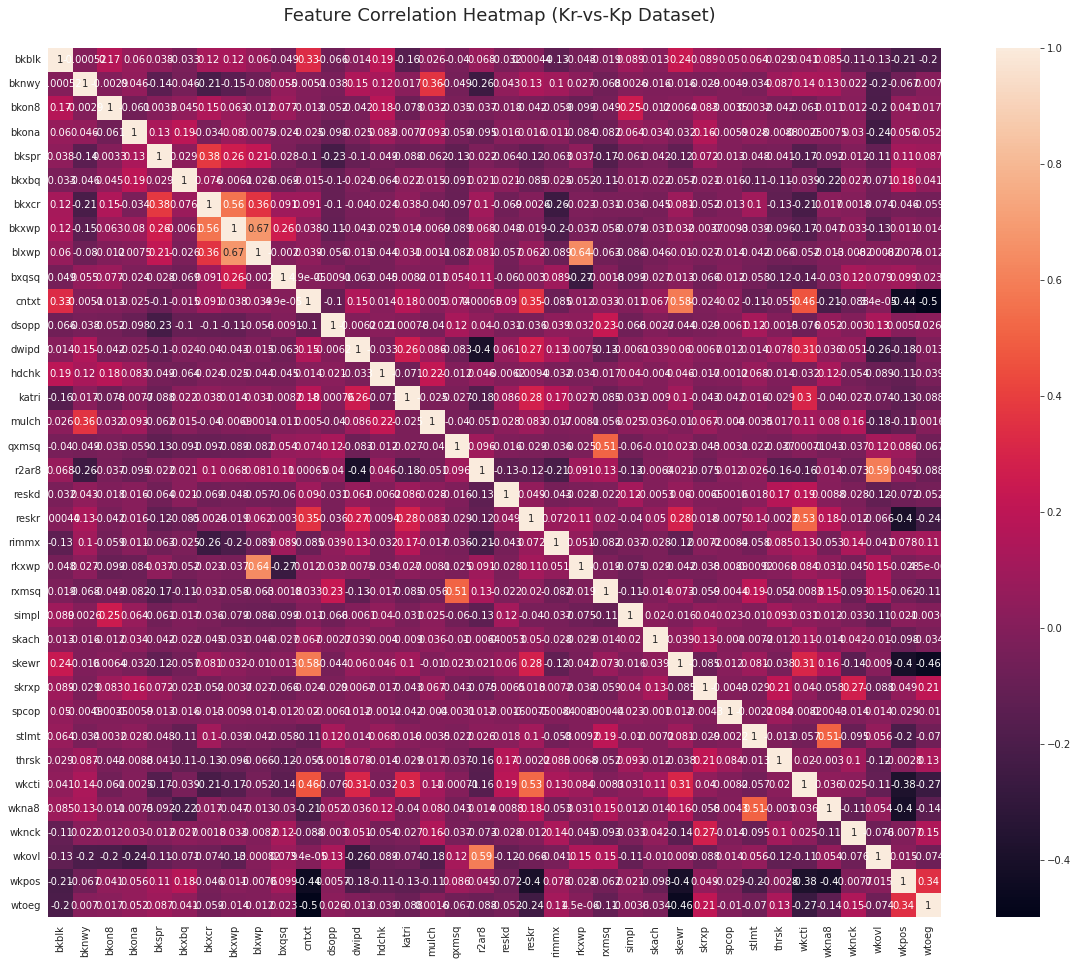

In [7]:
corr = X.corr()

heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0) 
heatmap.set_title('  Feature Correlation Heatmap (Kr-vs-Kp Dataset)\n', fontsize=18)
plt.show()

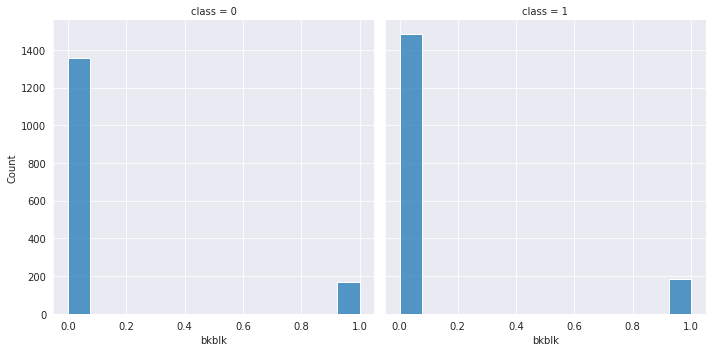

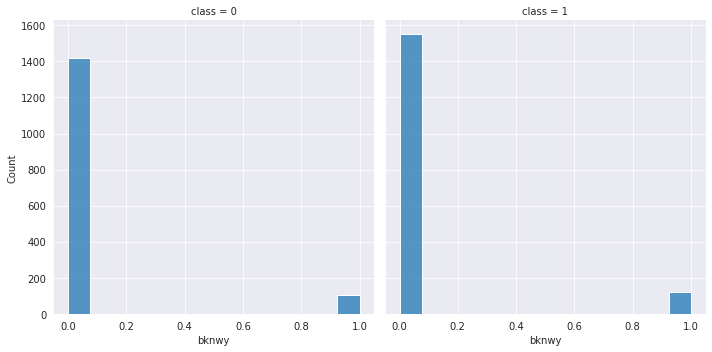

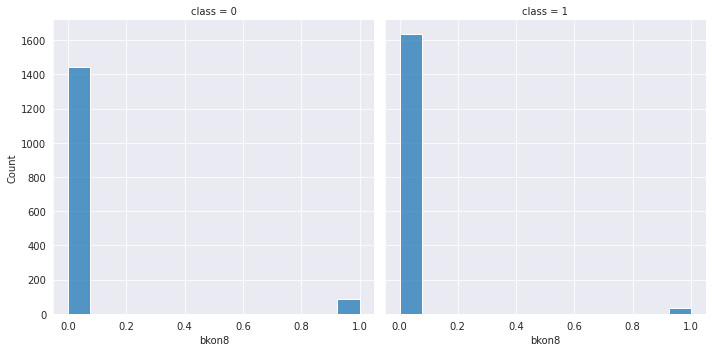

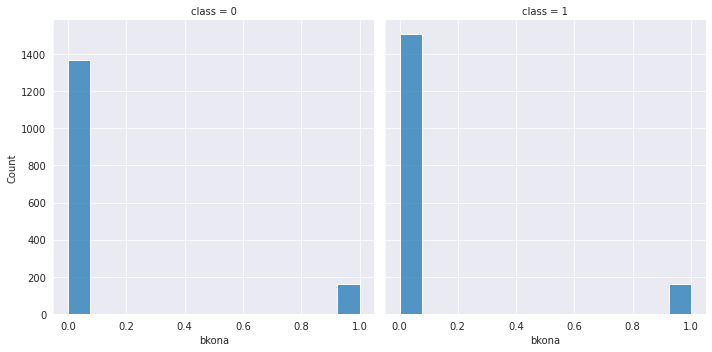

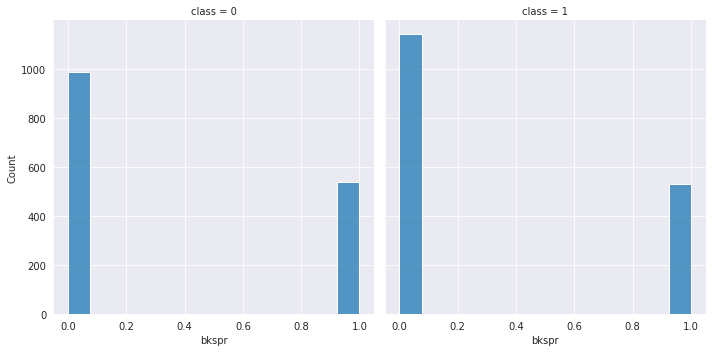

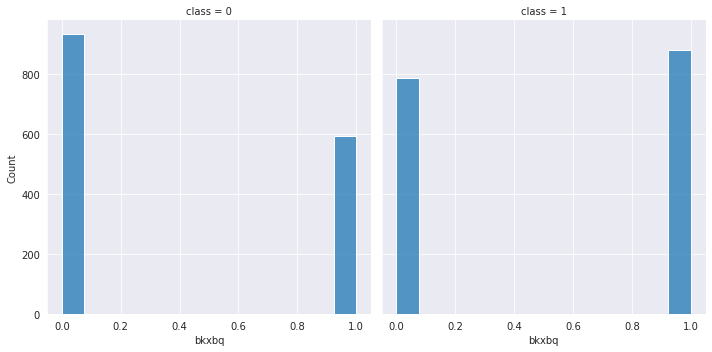

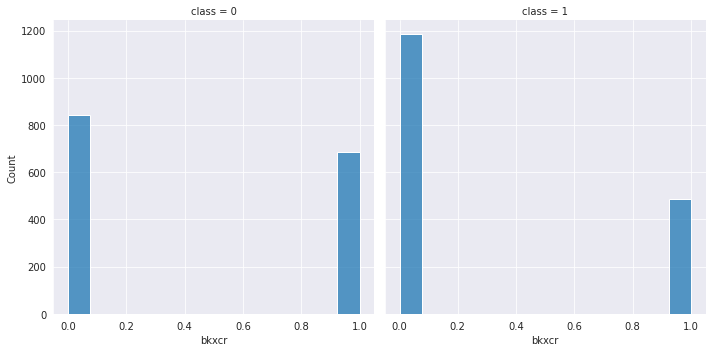

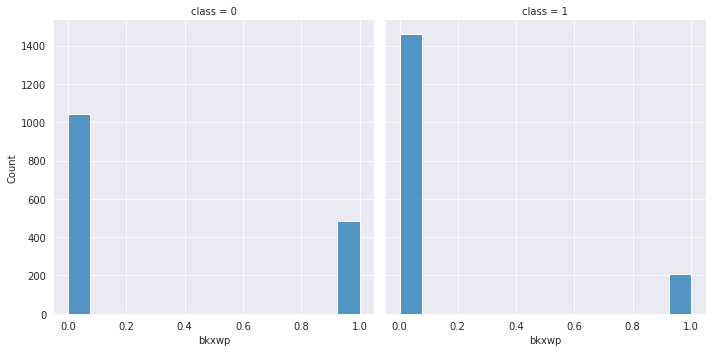

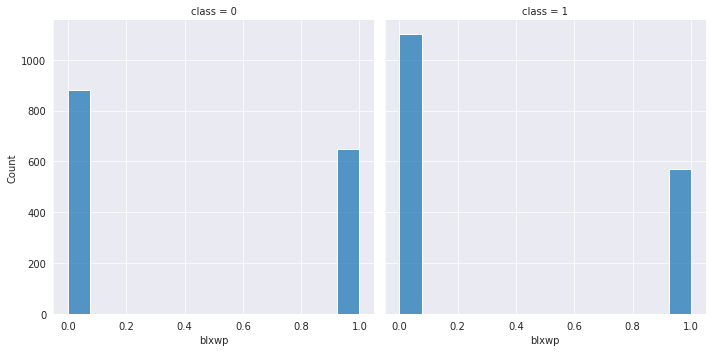

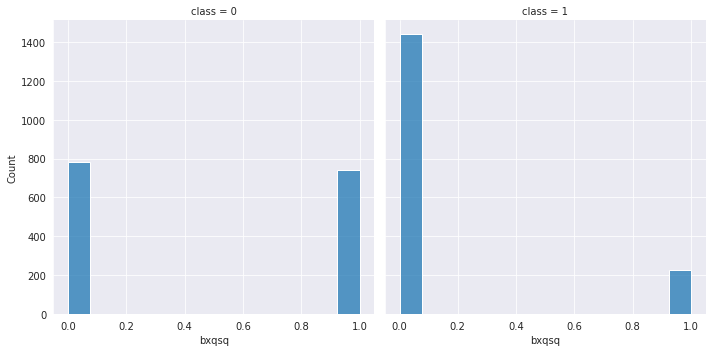

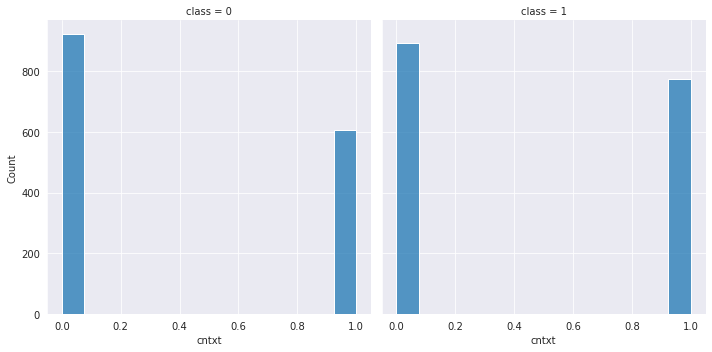

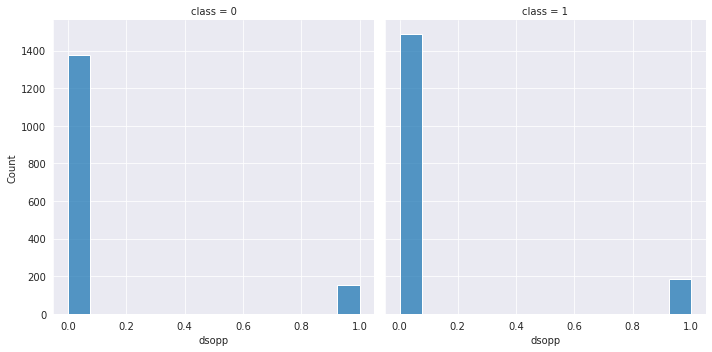

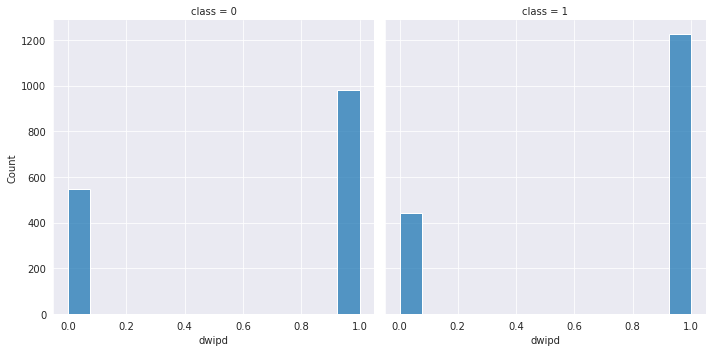

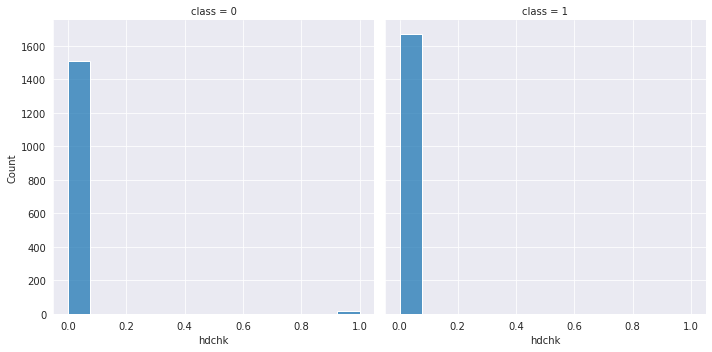

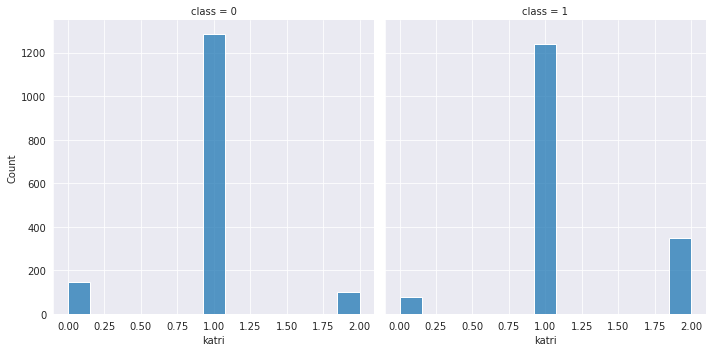

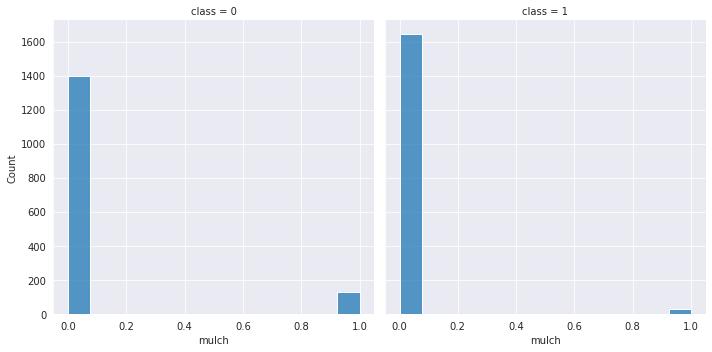

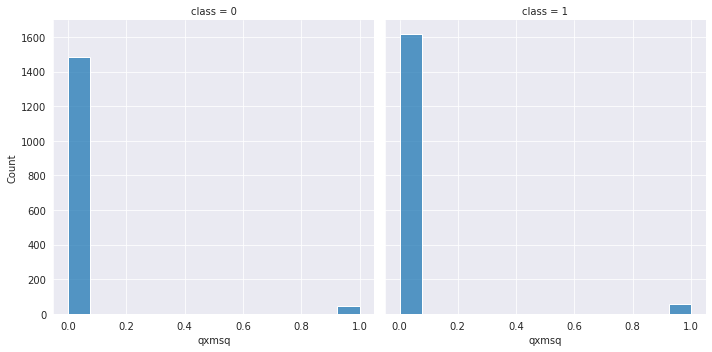

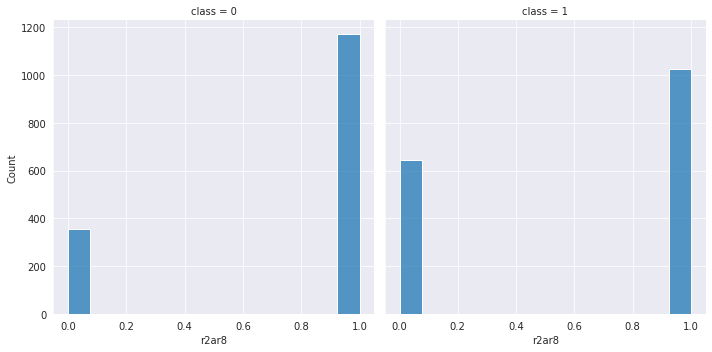

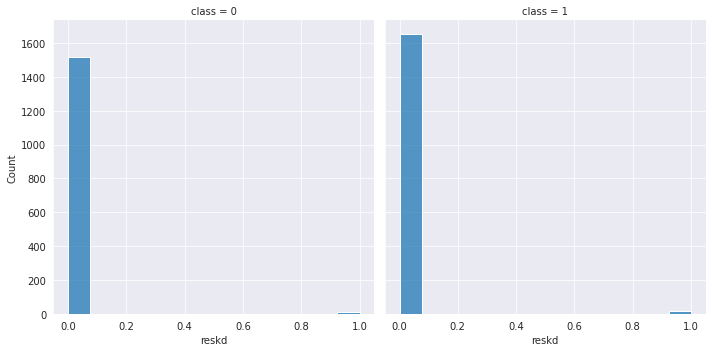

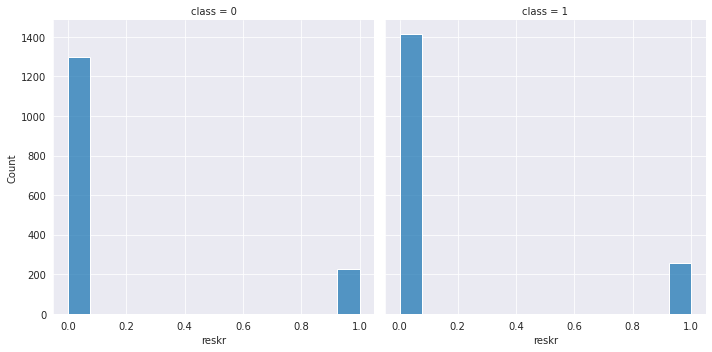

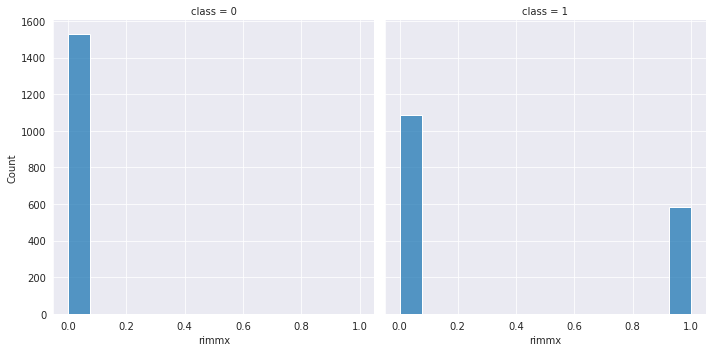

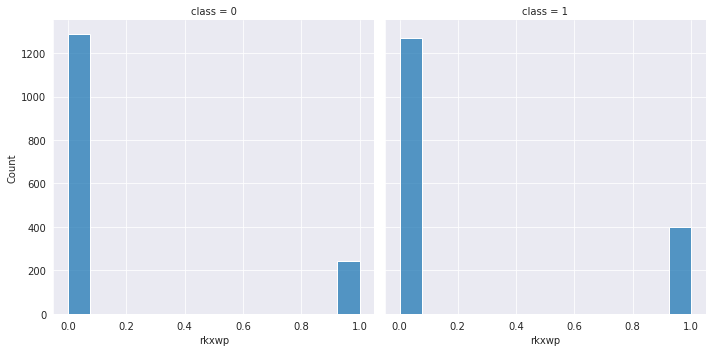

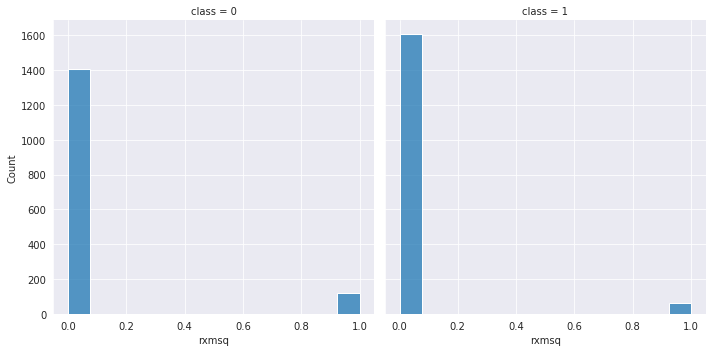

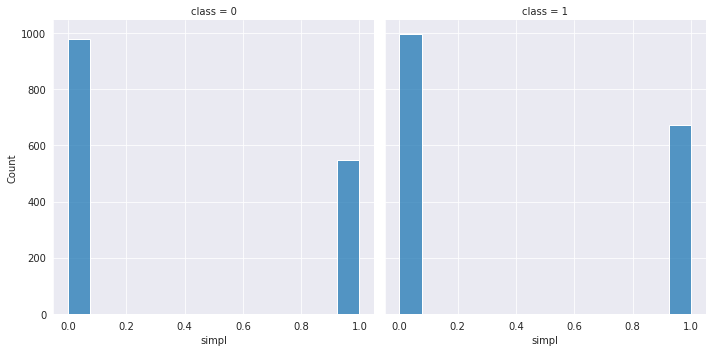

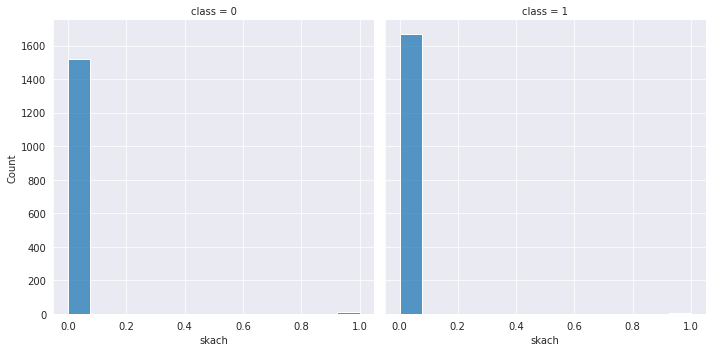

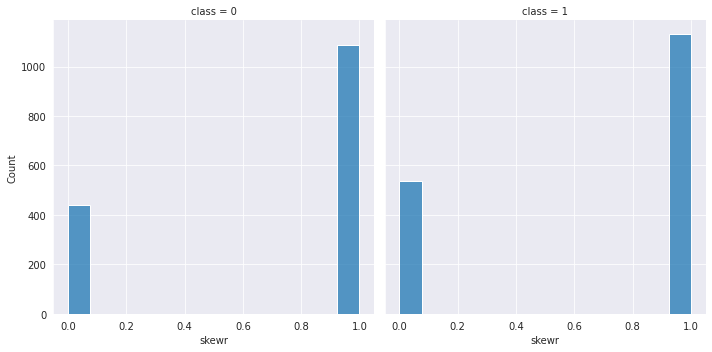

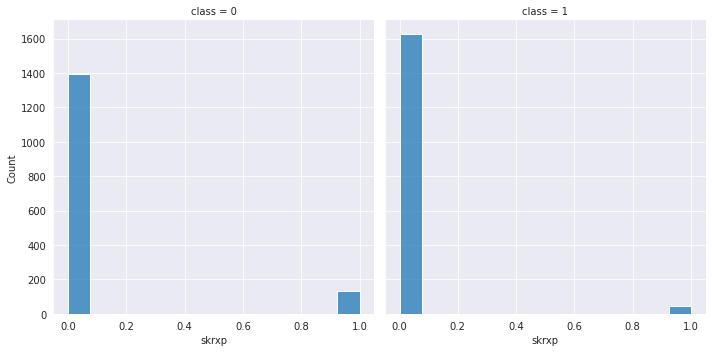

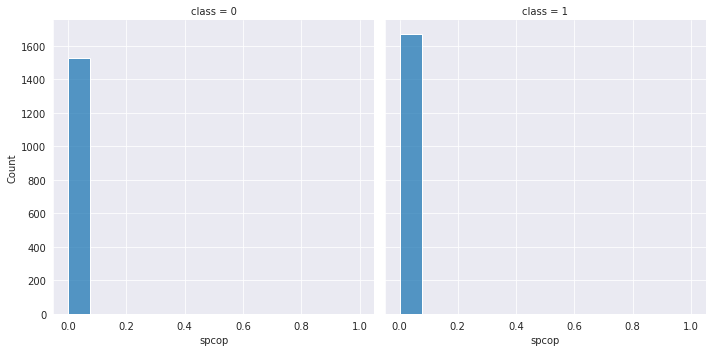

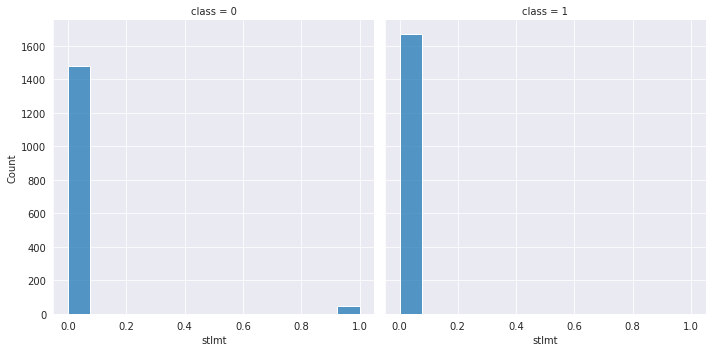

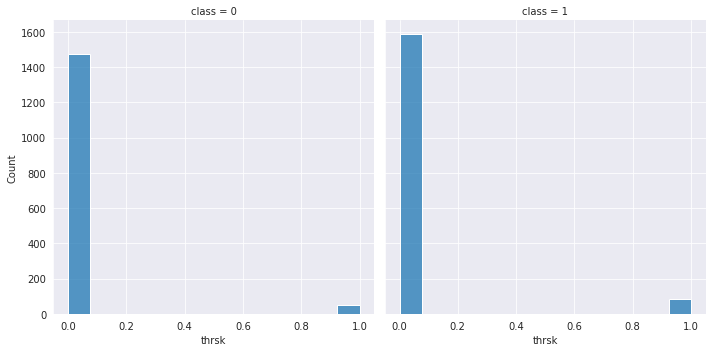

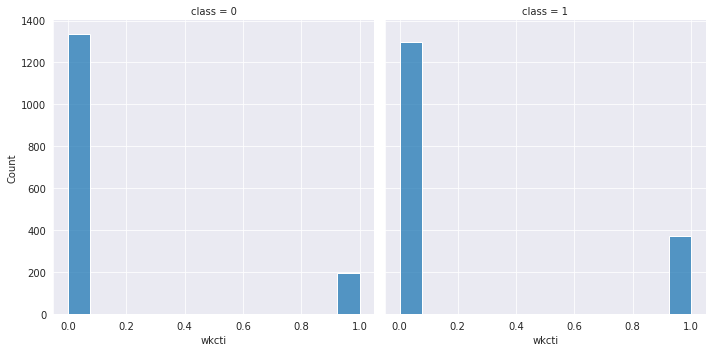

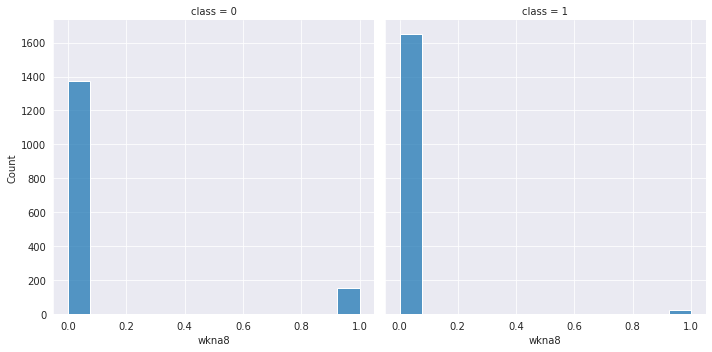

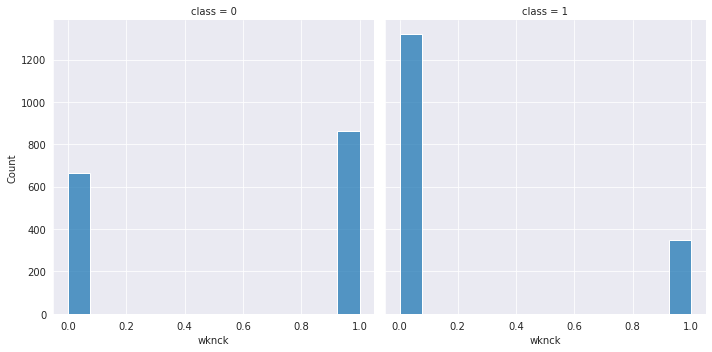

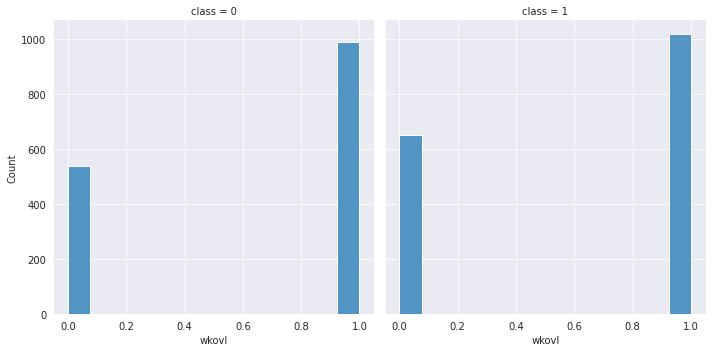

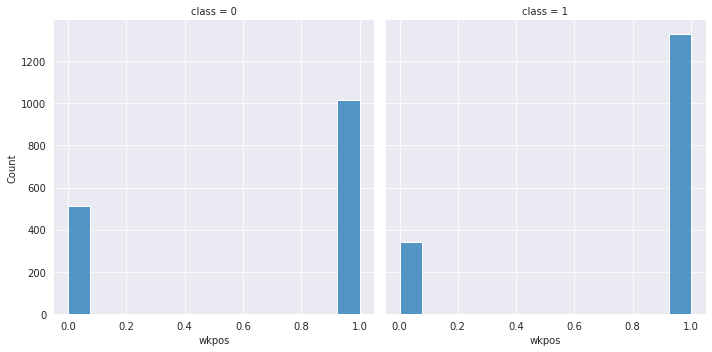

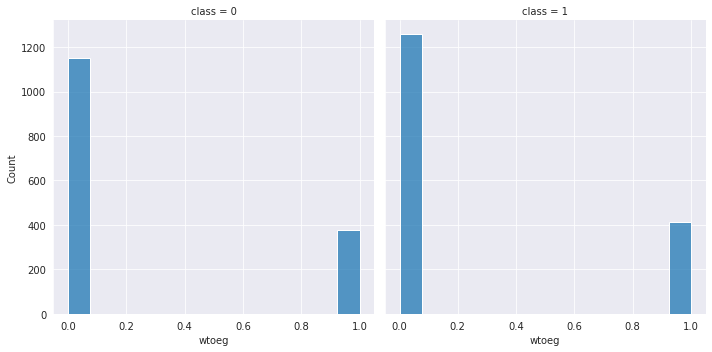

In [8]:
# Perform basic exploratory analysis of the dataset
for feature in FEATURES_LIST:
    plot = sns.displot(data=dataset, x=feature, col='class')
    plt.show()

In [9]:
# TSNE - 2D
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections,
    x = 0,
    y = 1,
    color = dataset['class'],
    labels={'color': 'class'}
)
fig.update_layout(
    title={
        'text': 'Kr vs Kp Dataset - TSNE 2D Visualization',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [10]:
# UMAP - 2D
umap = UMAP(n_components=2, random_state=0)
projections = umap.fit_transform(X)

fig = px.scatter(
    projections,
    x = 0,
    y = 1,
    color = dataset['class'],
    labels={'color': 'class'}
)
fig.update_layout(
    title={
        'text': 'Kr vs Kp Dataset - UMAP 2D Visualization',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [11]:
# TSNE - 3D
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(X)
fig = px.scatter_3d(
    projections,
    x = 0,
    y = 1,
    z = 2,
    color = dataset['class'],
    labels = {'color': 'class'}
)
fig.update_layout(
    title={
        'text': 'Kr vs Kp Dataset - t-SNE 3D Visualization',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()

In [12]:
# UMAP - 3D
umap = UMAP(n_components=3, random_state=0)
projections = umap.fit_transform(X)
fig = px.scatter_3d(
    projections,
    x = 0,
    y = 1,
    z = 2,
    color = dataset['class'],
    labels = {'color': 'class'}
)
fig.update_layout(
    title={
        'text': 'Kr vs Kp Dataset - UMAP 3D Visualization',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.update_traces(marker_size=8)
fig.show()